In [1]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [14]:
env.step(1)

(31, -1.0, False, {'prob': 1.0})

In [2]:
env = WindyGridworldEnv()

In [4]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [5]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        # One step in the environment
        for t in itertools.count():
            # Take a step
            next_state, reward, done, _ = env.step(action)
            
            # Pick the next action
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
    
            if done:
                break
                
            action = next_action
            state = next_state        
    
    return Q, stats

In [6]:
Q, stats = sarsa(env, 200)

Episode 200/200.

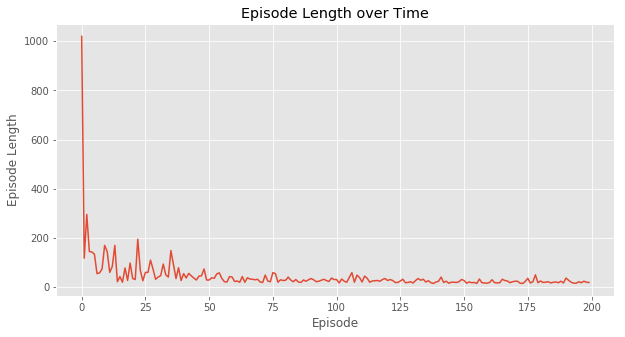

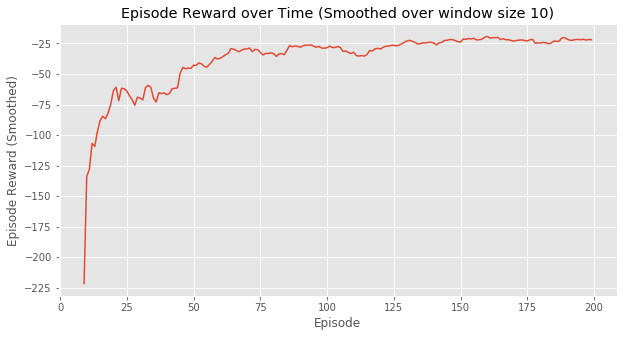

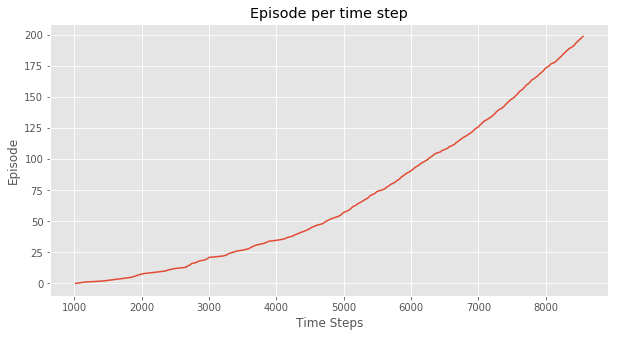

(<matplotlib.figure.Figure at 0xaf54ac8>,
 <matplotlib.figure.Figure at 0xb13f518>)

In [7]:
plotting.plot_episode_stats(stats)

In [15]:
Q

defaultdict(<function __main__.sarsa.<locals>.<lambda>>,
            {0: array([-15.97373229, -15.52877648, -15.98298319, -15.46745456]),
             1: array([-15.68585192, -15.41427791, -15.62904564, -15.7536675 ]),
             2: array([-15.41923691, -14.54744745, -15.22477817, -15.60544134]),
             3: array([-14.17181695, -13.00661994, -14.4900234 , -15.70632751]),
             4: array([-14.05009867, -12.58089102, -13.91219098, -14.31622682]),
             5: array([-12.76592345, -12.44192482, -12.65842562, -12.92588118]),
             6: array([-12.53821029, -11.53617414, -12.70127885, -11.86683768]),
             7: array([-10.98695208, -10.43177737, -11.20323779, -12.0083094 ]),
             8: array([ -9.91690204,  -9.05951734, -10.11547423,  -9.77105249]),
             9: array([-9.06433162, -9.2710319 , -7.38591523, -9.90474961]),
             10: array([-15.75876137, -15.81110069, -16.41861152, -15.67649361]),
             11: array([-15.56012887, -15.48694403, -15

In [16]:
def sarsa_breakdown(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))
    print('Q:',Q, 'stats:',stats)
    # The policy we're following
    policy = make_epsilon_greedy_policy_breakdown(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        print("------------------------------")
        print("------------------------------")
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        print('state:',state,'action_probs:',action_probs,'action:',action)
        
        # One step in the environment
        for t in itertools.count():
            # Take a step
            next_state, reward, done, _ = env.step(action)
            print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
            print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
            print('One step taken given A > next_state, reward, done:',next_state, reward, done)
            # Pick the next action
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            print('next_state:',next_state,'next_action_probs:',next_action_probs,'next_action:',next_action)
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            print('td_target:',td_target, 'td_delta:',td_delta,'Q[state][action]:',Q[state][action] )
            print('current Q:', Q)
            if done:
                break
                
            action = next_action
            state = next_state        
    
    return Q, stats

In [17]:
def make_epsilon_greedy_policy_breakdown(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        print('**************************')
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        print('Q:',Q, 'Q[observation]:',observation,Q[observation])
        print('best_action:',best_action, '--A:',A)
        print('**************************')
        return A
    return policy_fn

In [18]:
Q, stats = sarsa_breakdown(env, 1)

Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {}) stats: Stats(episode_lengths=array([ 0.]), episode_rewards=array([ 0.]))
------------------------------
------------------------------
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([ 0.,  0.,  0.,  0.])}) Q[observation]: 30 [ 0.  0.  0.  0.]
best_action: 0 --A: [ 0.925  0.025  0.025  0.025]
**************************
state: 30 action_probs: [ 0.925  0.025  0.025  0.025] action: 0
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
One step taken given A > next_state, reward, done: 20 -1.0 False
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([ 0.,  0.,  0.,  0.]), 20: array([ 0.,  0.,  0.,  0.])}) Q[observation]: 20 [ 0.  0.  0.  0.]
best_action: 0 --A: [ 0.925  0.025  0.025  0.025]
**************************
next_state: 20 next_action_probs: [ 

best_action: 0 --A: [ 0.925  0.025  0.025  0.025]
**************************
next_state: 3 next_action_probs: [ 0.925  0.025  0.025  0.025] next_action: 0
td_target: -1.0 td_delta: -1.0 Q[state][action]: -0.5
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.5,  0. ,  0. ,  0. ]), 20: array([-0.5,  0. ,  0. ,  0. ]), 10: array([-0.5,  0. ,  0. ,  0. ]), 0: array([-0.75, -0.5 ,  0.  ,  0.  ]), 1: array([-0.75, -0.5 ,  0.  ,  0.  ]), 2: array([-0.75, -0.5 ,  0.  ,  0.  ]), 3: array([ 0.,  0.,  0.,  0.])})
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
One step taken given A > next_state, reward, done: 3 -1.0 False
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.5,  0. ,  0. ,  0. ]), 20: array([-0.5,  0. ,  0. ,  0. ]), 10: array([-0.5,  0. ,  0. ,  0. ]), 0: array([-0.75, -0.5 ,  0.  ,  0.  ]), 1: array([-0.75, -0.5 ,  0.  ,  0.  ]), 2: arra

Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.5,  0. ,  0. ,  0. ]), 20: array([-0.5,  0. ,  0. ,  0. ]), 10: array([-0.5,  0. ,  0. ,  0. ]), 0: array([-0.75, -0.5 ,  0.  ,  0.  ]), 1: array([-0.75, -0.5 ,  0.  ,  0.  ]), 2: array([-0.75, -0.5 ,  0.  ,  0.  ]), 3: array([-0.75, -0.5 ,  0.  ,  0.  ]), 4: array([-0.75, -0.5 ,  0.  ,  0.  ]), 5: array([-0.75, -0.5 ,  0.  ,  0.  ]), 6: array([-0.75, -1.  , -0.75,  0.  ]), 7: array([-0.75, -1.  , -0.75, -0.5 ]), 8: array([-0.75, -0.75, -0.75, -0.5 ]), 9: array([-0.5, -0.5,  0. , -0.5]), 19: array([ 0.,  0.,  0.,  0.])}) Q[observation]: 19 [ 0.  0.  0.  0.]
best_action: 0 --A: [ 0.925  0.025  0.025  0.025]
**************************
next_state: 19 next_action_probs: [ 0.925  0.025  0.025  0.025] next_action: 0
td_target: -1.0 td_delta: -1.0 Q[state][action]: -0.5
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.5,  0. ,  0. ,  0. ]),

best_action: 0 --A: [ 0.925  0.025  0.025  0.025]
**************************
next_state: 4 next_action_probs: [ 0.925  0.025  0.025  0.025] next_action: 0
td_target: -1.75 td_delta: -1.0 Q[state][action]: -1.25
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.5,  0. ,  0. ,  0. ]), 20: array([-0.5,  0. ,  0. ,  0. ]), 10: array([-0.75,  0.  ,  0.  ,  0.  ]), 0: array([-0.75, -1.  , -0.75, -0.75]), 1: array([-0.75, -1.  , -0.5 , -0.5 ]), 2: array([-0.75, -1.  , -0.75, -0.5 ]), 3: array([-1.375, -1.375, -0.75 , -1.   ]), 4: array([-1.25 , -1.125, -0.75 , -1.   ]), 5: array([-1.125, -1.   , -0.75 , -0.75 ]), 6: array([-0.75, -1.  , -0.75, -1.  ]), 7: array([-0.75, -1.  , -0.75, -0.75]), 8: array([-0.75, -0.75, -0.75, -0.5 ]), 9: array([-1.25, -1.25, -0.75, -0.5 ]), 19: array([-0.75, -0.75, -0.5 , -0.5 ]), 29: array([-0.5,  0. ,  0. ,  0. ]), 18: array([ 0.  ,  0.  ,  0.  , -0.75]), 12: array([-0.5, -0.5,  0. ,  0. ]), 11: array([-0.

next_state: 5 next_action_probs: [ 0.025  0.025  0.025  0.925] next_action: 3
td_target: -1.75 td_delta: -0.5 Q[state][action]: -1.5
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.5,  0. ,  0. ,  0. ]), 20: array([-0.5, -0.5,  0. ,  0. ]), 10: array([-0.75, -0.5 , -0.5 ,  0.  ]), 0: array([-1.5  , -1.   , -0.875, -0.75 ]), 1: array([-0.75 , -1.   , -0.75 , -1.125]), 2: array([-1.5   , -1.6875, -1.125 , -1.    ]), 3: array([-2.125, -1.75 , -1.625, -1.5  ]), 4: array([-1.5   , -1.4375, -1.625 , -1.375 ]), 5: array([-1.125, -1.   , -1.5  , -0.75 ]), 6: array([-0.75, -1.  , -0.75, -1.  ]), 7: array([-0.75, -1.  , -0.75, -0.75]), 8: array([-0.75, -0.75, -0.75, -0.5 ]), 9: array([-1.25, -1.25, -0.75, -0.5 ]), 19: array([-0.75, -0.75, -0.5 , -0.5 ]), 29: array([-0.5,  0. ,  0. ,  0. ]), 18: array([ 0.  ,  0.  ,  0.  , -0.75]), 12: array([-1.25, -0.5 , -0.75, -0.5 ]), 11: array([-1. , -0.5, -0.5, -0.5]), 13: array([-0.875,  0.   ,  0. 

best_action: 3 --A: [ 0.025  0.025  0.025  0.925]
**************************
next_state: 8 next_action_probs: [ 0.025  0.025  0.025  0.925] next_action: 3
td_target: -2.375 td_delta: -2.375 Q[state][action]: -1.1875
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.5,  0. ,  0. ,  0. ]), 20: array([-0.5, -0.5,  0. ,  0. ]), 10: array([-0.75, -0.5 , -0.5 ,  0.  ]), 0: array([-1.5  , -1.   , -0.875, -0.75 ]), 1: array([-0.75 , -1.   , -0.75 , -1.125]), 2: array([-1.5   , -1.6875, -1.125 , -1.    ]), 3: array([-2.125, -1.75 , -1.625, -1.5  ]), 4: array([-1.5    , -1.71875, -1.625  , -1.375  ]), 5: array([-1.125  , -1.375  , -1.5    , -1.59375]), 6: array([-1.625 , -1.6875, -1.5625, -1.    ]), 7: array([-1.5 , -1.5 , -1.5 , -1.25]), 8: array([-1.5   , -1.4375, -1.6875, -1.375 ]), 9: array([-1.25 , -1.25 , -1.125, -1.125]), 19: array([-0.75, -0.75, -0.75, -0.5 ]), 29: array([-0.5 , -0.75, -0.5 , -0.5 ]), 18: array([ 0.  ,  0.  ,  0.  ,

td_target: -2.625 td_delta: -0.5625 Q[state][action]: -2.34375
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.5,  0. ,  0. ,  0. ]), 20: array([-0.5, -0.5,  0. ,  0. ]), 10: array([-0.75, -0.5 , -0.5 ,  0.  ]), 0: array([-1.5  , -1.   , -0.875, -0.75 ]), 1: array([-0.75 , -1.   , -0.75 , -1.125]), 2: array([-1.5   , -1.6875, -1.125 , -1.    ]), 3: array([-2.125, -1.75 , -1.625, -1.5  ]), 4: array([-1.5    , -1.71875, -1.625  , -1.375  ]), 5: array([-2.     , -1.96875, -1.8125 , -1.59375]), 6: array([-1.625  , -1.6875 , -2.34375, -1.75   ]), 7: array([-1.5    , -1.96875, -1.5    , -1.625  ]), 8: array([-2.34375, -1.78125, -2.5625 , -2.09375]), 9: array([-1.25  , -1.25  , -1.3125, -1.125 ]), 19: array([-0.75, -0.75, -0.75, -0.75]), 29: array([-0.5 , -0.75, -0.5 , -0.5 ]), 18: array([-1.25,  0.  ,  0.  , -0.75]), 12: array([-1.25, -0.5 , -0.75, -0.5 ]), 11: array([-1. , -0.5, -0.5, -0.5]), 13: array([-0.875,  0.   ,  0.   ,  0.   

One step taken given A > next_state, reward, done: 1 -1.0 False
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -0.5 ,  0.  ,  0.  ]), 20: array([-0.5  , -0.5  , -0.875, -1.125]), 10: array([-0.75, -0.5 , -0.5 ,  0.  ]), 0: array([-1.5  , -1.   , -0.875, -0.75 ]), 1: array([-1.5  , -1.   , -1.125, -1.125]), 2: array([-1.5    , -1.6875 , -1.53125, -1.375  ]), 3: array([-2.125   , -2.515625, -2.4375  , -2.15625 ]), 4: array([-2.3125   , -2.3515625, -2.421875 , -2.515625 ]), 5: array([-2.       , -1.96875  , -1.8125   , -2.4609375]), 6: array([-2.484375, -1.6875  , -2.546875, -2.171875]), 7: array([-1.5    , -1.96875, -1.5    , -1.625  ]), 8: array([-2.34375, -1.78125, -2.5625 , -2.09375]), 9: array([-1.25  , -1.25  , -1.3125, -1.125 ]), 19: array([-0.75, -0.75, -0.75, -0.75]), 29: array([-0.5 , -0.75, -0.5 , -0.5 ]), 18: array([-1.25,  0.  ,  0.  , -0.75]), 12: array([-1.25, -1.25, -0.75, -1.  ]), 11: array(

**************************
next_state: 7 next_action_probs: [ 0.025  0.025  0.025  0.925] next_action: 3
td_target: -2.625 td_delta: -1.875 Q[state][action]: -1.6875
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -0.5 ,  0.  ,  0.  ]), 20: array([-0.5  , -0.5  , -0.875, -1.125]), 10: array([-0.75, -0.5 , -0.5 ,  0.  ]), 0: array([-1.5  , -1.   , -0.875, -0.75 ]), 1: array([-1.5    , -1.84375, -1.125  , -1.125  ]), 2: array([-2.265625, -2.40625 , -1.640625, -1.6875  ]), 3: array([-2.890625, -2.515625, -2.4375  , -2.328125]), 4: array([-3.08203125, -2.58203125, -2.421875  , -2.515625  ]), 5: array([-2.       , -2.328125 , -2.640625 , -2.4609375]), 6: array([-2.484375, -2.09375 , -2.546875, -2.171875]), 7: array([-2.234375  , -2.73828125, -2.6875    , -1.625     ]), 8: array([-2.34375   , -2.20703125, -2.5625    , -2.296875  ]), 9: array([-2.        , -2.14453125, -1.7578125 , -2.56640625]), 19: array([-1.640625, -1.5     , -1

best_action: 1 --A: [ 0.025  0.925  0.025  0.025]
**************************
next_state: 30 next_action_probs: [ 0.025  0.925  0.025  0.025] next_action: 1
td_target: -1.5 td_delta: -1.0 Q[state][action]: -1.0
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -0.5 , -0.5 , -1.  ]), 20: array([-0.5  , -0.5  , -0.875, -1.125]), 10: array([-0.75 , -1.125, -0.5  , -1.   ]), 0: array([-1.5  , -1.   , -0.875, -0.75 ]), 1: array([-1.5    , -1.84375, -1.3125 , -1.125  ]), 2: array([-2.265625, -2.40625 , -1.640625, -1.90625 ]), 3: array([-2.890625 , -2.515625 , -2.4375   , -2.5078125]), 4: array([-3.29882812, -2.58203125, -3.50195312, -2.921875  ]), 5: array([-2.9140625 , -2.90625   , -2.640625  , -2.94140625]), 6: array([-3.265625  , -2.6640625 , -3.31640625, -3.0234375 ]), 7: array([-2.796875  , -2.73828125, -2.6875    , -2.765625  ]), 8: array([-2.34375   , -2.20703125, -2.5625    , -2.296875  ]), 9: array([-2.        , -2.14453125,

next_state: 3 next_action_probs: [ 0.025  0.025  0.925  0.025] next_action: 2
td_target: -3.4375 td_delta: -1.0 Q[state][action]: -2.9375
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -1.  , -0.5 , -1.  ]), 20: array([-0.5  , -0.5  , -0.875, -1.125]), 10: array([-0.75 , -1.125, -0.5  , -1.   ]), 0: array([-1.5  , -1.   , -0.875, -0.75 ]), 1: array([-1.5    , -1.84375, -1.3125 , -1.125  ]), 2: array([-2.265625, -2.40625 , -1.640625, -1.90625 ]), 3: array([-2.890625 , -2.515625 , -2.9375   , -2.5078125]), 4: array([-3.29882812, -3.11132812, -3.50195312, -3.1796875 ]), 5: array([-3.67773438, -3.28515625, -3.5234375 , -3.43164062]), 6: array([-3.265625  , -3.17578125, -3.31640625, -3.46875   ]), 7: array([-2.796875  , -2.97265625, -3.46289062, -3.39453125]), 8: array([-2.34375   , -2.48242188, -2.5625    , -3.03125   ]), 9: array([-2.        , -2.14453125, -1.84765625, -2.56640625]), 19: array([-1.640625, -1.5     , -1.125   ,

One step taken given A > next_state, reward, done: 8 -1.0 False
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -1.  , -0.75, -1.  ]), 20: array([-1.125 , -1.    , -1.1875, -1.125 ]), 10: array([-1.375, -1.125, -1.25 , -1.   ]), 0: array([-1.5    , -1.65625, -1.1875 , -1.5625 ]), 1: array([-1.5    , -1.84375, -1.53125, -1.4375 ]), 2: array([-2.265625 , -2.40625  , -1.9453125, -2.015625 ]), 3: array([-2.890625  , -3.31347656, -3.22265625, -2.57421875]), 4: array([-3.29882812, -3.69824219, -3.50195312, -3.1796875 ]), 5: array([-3.67773438, -3.73046875, -3.5234375 , -3.43164062]), 6: array([-3.265625  , -3.48632812, -3.31640625, -3.46875   ]), 7: array([-3.63476562, -2.97265625, -3.46289062, -3.39453125]), 8: array([-2.34375   , -2.48242188, -2.5625    , -3.03125   ]), 9: array([-2.        , -2.14453125, -1.84765625, -2.56640625]), 19: array([-1.640625, -1.5     , -1.125   , -1.59375 ]), 29: array([-1.125, -0

next_state: 49 next_action_probs: [ 0.025  0.925  0.025  0.025] next_action: 1
td_target: -1.0 td_delta: -1.0 Q[state][action]: -0.5
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -1.  , -0.75, -1.  ]), 20: array([-1.125 , -1.    , -1.1875, -1.125 ]), 10: array([-1.375, -1.125, -1.25 , -1.   ]), 0: array([-1.5    , -1.65625, -1.1875 , -1.5625 ]), 1: array([-1.5    , -1.84375, -1.53125, -1.4375 ]), 2: array([-2.265625 , -2.40625  , -1.9453125, -2.015625 ]), 3: array([-2.890625  , -3.31347656, -3.22265625, -2.57421875]), 4: array([-3.29882812, -3.69824219, -3.50195312, -3.1796875 ]), 5: array([-3.67773438, -3.73046875, -3.5234375 , -3.43164062]), 6: array([-3.265625  , -3.48632812, -3.31640625, -3.46875   ]), 7: array([-3.63476562, -3.41162109, -3.46289062, -3.39453125]), 8: array([-2.953125  , -2.83251953, -3.02246094, -3.03125   ]), 9: array([-2.82226562, -2.89697266, -2.32470703, -2.56640625]), 19: array([-1.640625 , -2.28

One step taken given A > next_state, reward, done: 7 -1.0 False
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -1.  , -0.75, -1.  ]), 20: array([-1.125 , -1.    , -1.1875, -1.125 ]), 10: array([-1.375, -1.125, -1.25 , -1.   ]), 0: array([-1.5    , -1.65625, -1.1875 , -1.5625 ]), 1: array([-1.5    , -1.84375, -1.53125, -1.4375 ]), 2: array([-2.265625 , -2.40625  , -1.9453125, -2.015625 ]), 3: array([-2.890625  , -3.31347656, -3.22265625, -2.57421875]), 4: array([-3.29882812, -3.69824219, -3.50195312, -3.1796875 ]), 5: array([-3.67773438, -3.73046875, -3.5234375 , -3.43164062]), 6: array([-3.265625  , -3.94897461, -3.31640625, -3.46875   ]), 7: array([-4.13476562, -3.78759766, -4.29248047, -3.94042969]), 8: array([-3.73779297, -3.07861328, -3.77685547, -3.83300781]), 9: array([-2.82226562, -2.89697266, -2.45922852, -2.56640625]), 19: array([-1.640625 , -2.2890625, -1.6640625, -1.984375 ]), 29: array([-1.125

td_target: -2.71875 td_delta: -0.71875 Q[state][action]: -2.359375
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -1.  , -0.75, -1.  ]), 20: array([-1.125 , -1.    , -1.1875, -1.125 ]), 10: array([-1.375, -1.125, -1.25 , -1.   ]), 0: array([-1.5    , -1.65625, -1.1875 , -1.5625 ]), 1: array([-1.5    , -1.84375, -1.53125, -1.4375 ]), 2: array([-2.265625 , -2.40625  , -1.9453125, -2.015625 ]), 3: array([-2.890625  , -3.31347656, -3.22265625, -2.57421875]), 4: array([-3.29882812, -3.69824219, -3.50195312, -3.1796875 ]), 5: array([-3.67773438, -3.73046875, -3.5234375 , -3.43164062]), 6: array([-3.265625  , -3.94897461, -3.31640625, -3.46875   ]), 7: array([-4.46118164, -3.93310547, -4.29248047, -3.94042969]), 8: array([-3.73779297, -3.5123291 , -3.77685547, -3.83300781]), 9: array([-2.82226562, -2.89697266, -2.87782288, -3.49203491]), 19: array([-2.59527588, -2.2890625 , -2.28369141, -2.56884766]), 29: array([-2.03613281, -2.35

next_state: 48 next_action_probs: [ 0.025  0.925  0.025  0.025] next_action: 1
td_target: -1.0 td_delta: -1.0 Q[state][action]: -0.5
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -1.  , -0.75, -1.  ]), 20: array([-1.125 , -1.    , -1.1875, -1.125 ]), 10: array([-1.375, -1.125, -1.25 , -1.   ]), 0: array([-1.5    , -1.65625, -1.1875 , -1.5625 ]), 1: array([-1.5    , -1.84375, -1.53125, -1.4375 ]), 2: array([-2.265625 , -2.40625  , -1.9453125, -2.015625 ]), 3: array([-2.890625  , -3.31347656, -3.22265625, -2.57421875]), 4: array([-3.29882812, -3.69824219, -3.50195312, -3.1796875 ]), 5: array([-3.67773438, -3.73046875, -3.5234375 , -3.43164062]), 6: array([-3.265625  , -3.94897461, -3.31640625, -3.46875   ]), 7: array([-4.46118164, -4.22271729, -4.29248047, -3.94042969]), 8: array([-3.73779297, -3.89270401, -3.77685547, -3.83300781]), 9: array([-3.60004425, -3.35961914, -3.18490982, -3.49203491]), 19: array([-2.59527588, -3.1

One step taken given A > next_state, reward, done: 21 -1.0 False
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -1.  , -0.75, -1.  ]), 20: array([-1.125 , -1.    , -1.1875, -1.125 ]), 10: array([-1.375 , -1.5625, -1.25  , -1.8125]), 0: array([-1.5    , -1.65625, -1.59375, -1.5625 ]), 1: array([-1.5    , -1.84375, -1.53125, -1.8125 ]), 2: array([-2.265625  , -2.40625   , -1.97265625, -2.015625  ]), 3: array([-2.890625  , -3.31347656, -3.22265625, -2.75976562]), 4: array([-3.29882812, -3.69824219, -3.50195312, -3.37695312]), 5: array([-3.67773438, -3.73046875, -3.5234375 , -3.80566406]), 6: array([-4.04101562, -3.94897461, -4.14257812, -3.95019531]), 7: array([-4.46118164, -4.22271729, -4.29248047, -4.10302734]), 8: array([-4.50732422, -3.89270401, -4.55493164, -4.38671875]), 9: array([-3.60004425, -3.35961914, -3.18490982, -3.49203491]), 19: array([-2.59527588, -3.14904785, -2.62561035, -2.56884766]), 29: 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
One step taken given A > next_state, reward, done: 0 -1.0 False
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-0.75, -1.  , -0.75, -1.  ]), 20: array([-1.75   , -1.59375, -1.1875 , -1.125  ]), 10: array([-1.375 , -1.5625, -1.625 , -1.8125]), 0: array([-1.5    , -1.65625, -1.59375, -1.5625 ]), 1: array([-2.265625, -1.84375 , -1.953125, -1.8125  ]), 2: array([-2.265625  , -2.40625   , -2.14257812, -2.2578125 ]), 3: array([-2.890625  , -3.31347656, -3.22265625, -2.88769531]), 4: array([-4.08789062, -3.69824219, -3.50195312, -3.56835938]), 5: array([-4.45410156, -4.33972168, -4.35058594, -4.05224609]), 6: array([-4.04101562, -4.52600098, -4.54638672, -4.37792969]), 7: array([-4.46118164, -4.22271729, -4.29248047, -4.62280273]), 8: array([-4.50732422, -3.89270401, -4.55493164, -4.38671875]), 9: array([-3.60004425, -3.35961914, -3.18490982, -3.49203491]), 

next_state: 30 next_action_probs: [ 0.025  0.925  0.025  0.025] next_action: 1
td_target: -2.0 td_delta: -1.5 Q[state][action]: -1.25
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-1.4375, -1.    , -1.125 , -1.    ]), 20: array([-1.75   , -1.59375, -1.46875, -2.15625]), 10: array([-1.9375, -2.    , -1.625 , -1.8125]), 0: array([-2.28125 , -1.65625 , -2.078125, -2.328125]), 1: array([-2.265625, -1.84375 , -1.953125, -1.8125  ]), 2: array([-2.265625  , -2.40625   , -2.14257812, -2.2578125 ]), 3: array([-2.890625  , -3.31347656, -3.22265625, -2.88769531]), 4: array([-4.08789062, -3.69824219, -3.50195312, -3.56835938]), 5: array([-4.45410156, -4.33972168, -4.35058594, -4.05224609]), 6: array([-4.04101562, -4.52600098, -4.54638672, -4.37792969]), 7: array([-4.46118164, -4.22271729, -4.29248047, -4.62280273]), 8: array([-4.50732422, -3.89270401, -4.55493164, -4.38671875]), 9: array([-3.60004425, -3.35961914, -3.18490982, -3.49203491]),

current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-1.4375, -1.6875, -1.125 , -1.    ]), 20: array([-1.75   , -1.59375, -1.46875, -2.15625]), 10: array([-1.9375, -2.    , -1.625 , -1.8125]), 0: array([-2.28125 , -1.65625 , -2.078125, -2.328125]), 1: array([-2.265625, -1.84375 , -1.953125, -1.8125  ]), 2: array([-2.265625  , -2.40625   , -2.14257812, -2.2578125 ]), 3: array([-2.890625  , -3.31347656, -3.22265625, -2.88769531]), 4: array([-4.328125  , -3.69824219, -4.54492188, -3.72802734]), 5: array([-4.45410156, -4.33972168, -4.35058594, -4.05224609]), 6: array([-4.04101562, -4.52600098, -4.54638672, -4.37792969]), 7: array([-4.46118164, -4.22271729, -4.29248047, -4.62280273]), 8: array([-4.50732422, -3.89270401, -4.55493164, -4.38671875]), 9: array([-3.60004425, -3.35961914, -3.18490982, -3.49203491]), 19: array([-2.59527588, -3.14904785, -2.62561035, -2.56884766]), 29: array([-2.03613281, -2.359375  , -1.93359375, -1.7578125 ]), 18:

current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-1.4375, -1.6875, -1.125 , -1.    ]), 20: array([-1.75   , -1.59375, -1.46875, -2.15625]), 10: array([-1.9375  , -2.      , -2.046875, -1.8125  ]), 0: array([-2.28125  , -2.25     , -2.3515625, -2.328125 ]), 1: array([-2.265625 , -2.5546875, -2.3359375, -2.65625  ]), 2: array([-3.0859375 , -3.2713623 , -2.64111328, -2.74414062]), 3: array([-3.70288086, -3.31347656, -3.55664062, -3.40740967]), 4: array([-4.328125  , -3.69824219, -4.54492188, -3.72802734]), 5: array([-4.45410156, -4.33972168, -4.35058594, -4.05224609]), 6: array([-4.04101562, -4.52600098, -4.54638672, -4.37792969]), 7: array([-4.46118164, -4.22271729, -4.29248047, -4.62280273]), 8: array([-4.50732422, -3.89270401, -4.55493164, -4.38671875]), 9: array([-3.60004425, -3.35961914, -3.18490982, -3.49203491]), 19: array([-2.59527588, -3.14904785, -2.62561035, -2.56884766]), 29: array([-2.03613281, -2.359375  , -1.93359375, -1

Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-1.4375, -1.6875, -1.3125, -1.8125]), 20: array([-1.75    , -1.59375 , -1.734375, -2.15625 ]), 10: array([-1.9375  , -2.      , -2.046875, -1.8125  ]), 0: array([-2.28125  , -2.25     , -2.3515625, -2.328125 ]), 1: array([-2.265625 , -2.5546875, -2.3359375, -2.65625  ]), 2: array([-3.0859375 , -3.2713623 , -2.64111328, -2.74414062]), 3: array([-3.70288086, -4.32080078, -3.55664062, -3.40740967]), 4: array([-4.85168457, -4.85748291, -4.54492188, -4.02075195]), 5: array([-4.45410156, -4.33972168, -4.35058594, -4.39013672]), 6: array([-4.04101562, -4.52600098, -4.54638672, -4.37792969]), 7: array([-4.46118164, -4.22271729, -4.29248047, -4.62280273]), 8: array([-4.50732422, -3.89270401, -4.55493164, -4.38671875]), 9: array([-3.60004425, -3.35961914, -3.18490982, -3.49203491]), 19: array([-2.59527588, -3.14904785, -2.62561035, -2.56884766]), 29: array([-2.03613281, -2.359375  , -1.93359375, -1.757

best_action: 2 --A: [ 0.025  0.025  0.925  0.025]
**************************
next_state: 2 next_action_probs: [ 0.025  0.025  0.925  0.025] next_action: 2
td_target: -3.83227539063 td_delta: -1.27758789063 Q[state][action]: -3.19348144531
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-1.4375, -1.6875, -1.3125, -1.8125]), 20: array([-1.75    , -1.59375 , -1.734375, -2.15625 ]), 10: array([-2.59375 , -2.      , -2.046875, -2.875   ]), 0: array([-2.28125   , -2.90234375, -2.3515625 , -2.328125  ]), 1: array([-3.05078125, -3.19348145, -2.57421875, -2.65625   ]), 2: array([-3.0859375 , -3.2713623 , -2.83227539, -3.00488281]), 3: array([-3.70288086, -4.32080078, -3.55664062, -3.63420105]), 4: array([-4.85168457, -4.85748291, -4.54492188, -4.21408081]), 5: array([-4.45410156, -4.69036865, -5.12036133, -4.70544434]), 6: array([-5.04370117, -4.52600098, -4.9621582 , -4.86425781]), 7: array([-4.46118164, -4.22271729, -4.29248047, -4.622802

next_state: 60 next_action_probs: [ 0.025  0.025  0.025  0.925] next_action: 3
td_target: -1.0 td_delta: -1.0 Q[state][action]: -0.5
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-1.4375, -1.6875, -1.3125, -1.8125]), 20: array([-1.75    , -1.59375 , -1.734375, -2.15625 ]), 10: array([-2.59375 , -2.      , -2.046875, -2.875   ]), 0: array([-2.28125   , -2.90234375, -2.3515625 , -2.328125  ]), 1: array([-3.05078125, -3.19348145, -2.85742188, -2.65625   ]), 2: array([-3.0859375 , -3.2713623 , -3.0322876 , -3.28955078]), 3: array([-3.70288086, -4.32080078, -3.55664062, -3.63420105]), 4: array([-4.85168457, -4.85748291, -4.54492188, -4.21408081]), 5: array([-4.45410156, -4.69036865, -5.12036133, -4.70544434]), 6: array([-5.04370117, -4.52600098, -4.9621582 , -4.86425781]), 7: array([-4.46118164, -4.22271729, -4.29248047, -4.62280273]), 8: array([-4.50732422, -3.89270401, -4.55493164, -4.38671875]), 9: array([-3.60004425, -3.35961914, 

td_target: -4.35961914063 td_delta: -0.320812225342 Q[state][action]: -4.19921302795
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-1.4375, -1.6875, -1.3125, -1.8125]), 20: array([-1.75    , -1.59375 , -1.734375, -2.15625 ]), 10: array([-2.59375 , -2.      , -2.046875, -2.875   ]), 0: array([-2.28125   , -2.90234375, -2.3515625 , -2.328125  ]), 1: array([-3.05078125, -3.19348145, -2.85742188, -2.65625   ]), 2: array([-3.0859375 , -3.2713623 , -3.0322876 , -3.28955078]), 3: array([-3.70288086, -4.32080078, -3.55664062, -3.63420105]), 4: array([-4.85168457, -4.85748291, -4.54492188, -4.21408081]), 5: array([-5.32223511, -5.10818481, -5.12036133, -4.70544434]), 6: array([-5.04370117, -4.87435913, -4.9621582 , -4.86425781]), 7: array([-4.46118164, -4.88882446, -4.29248047, -4.62280273]), 8: array([-4.77306557, -4.19921303, -4.72381783, -4.38671875]), 9: array([-3.60004425, -3.35961914, -3.37687874, -3.49203491]), 19: array([-2.595275

One step taken given A > next_state, reward, done: 3 -1.0 False
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-1.4375, -1.6875, -1.3125, -1.8125]), 20: array([-1.75    , -1.59375 , -1.734375, -2.15625 ]), 10: array([-2.59375 , -2.      , -2.046875, -2.875   ]), 0: array([-2.28125   , -2.90234375, -2.3515625 , -2.328125  ]), 1: array([-3.05078125, -3.19348145, -2.85742188, -2.65625   ]), 2: array([-3.0859375 , -3.2713623 , -3.0322876 , -3.28955078]), 3: array([-3.70288086, -4.32080078, -3.55664062, -3.63420105]), 4: array([-4.85168457, -4.85748291, -4.54492188, -4.21408081]), 5: array([-5.32223511, -5.10818481, -5.12036133, -4.95976257]), 6: array([-5.04370117, -5.0834198 , -4.9621582 , -5.28485107]), 7: array([-5.29199219, -5.13777161, -5.34065247, -5.24353027]), 8: array([-4.77306557, -4.19921303, -4.72381783, -4.9239502 ]), 9: array([-3.60004425, -4.11824894, -3.55584383, -3.49203491]), 19: array([-3.54067659

next_state: 2 next_action_probs: [ 0.025  0.025  0.925  0.025] next_action: 2
td_target: -4.08450317383 td_delta: -0.251258850098 Q[state][action]: -3.95887374878
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-1.4375, -1.6875, -1.3125, -1.8125]), 20: array([-1.75    , -2.140625, -1.734375, -2.15625 ]), 10: array([-2.59375   , -2.79736328, -2.046875  , -2.875     ]), 0: array([-2.28125   , -2.90234375, -2.3515625 , -2.328125  ]), 1: array([-3.05078125, -3.19348145, -2.85742188, -2.65625   ]), 2: array([-3.0859375 , -3.2713623 , -3.08450317, -3.28955078]), 3: array([-4.51806259, -4.32080078, -4.34542084, -3.95887375]), 4: array([-4.85168457, -4.85748291, -4.54492188, -4.54412079]), 5: array([-5.32223511, -5.10818481, -5.12036133, -5.17256165]), 6: array([-5.04370117, -5.0834198 , -4.9621582 , -5.28485107]), 7: array([-5.29199219, -5.13777161, -5.34065247, -5.24353027]), 8: array([-4.77306557, -4.19921303, -4.72381783, -4.9239502 ])

td_target: -2.0 td_delta: -0.625 Q[state][action]: -1.6875
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-2.296875, -1.6875  , -2.015625, -1.8125  ]), 20: array([-2.5703125 , -2.140625  , -2.33984375, -2.453125  ]), 10: array([-2.59375   , -2.79736328, -2.70703125, -2.875     ]), 0: array([-3.0546875 , -2.90234375, -2.69921875, -3.08984375]), 1: array([-3.05078125, -3.19348145, -2.85742188, -2.96875   ]), 2: array([-3.9286499 , -4.14688396, -3.33326721, -3.47290039]), 3: array([-4.51806259, -4.32080078, -4.34542084, -4.1559782 ]), 4: array([-4.85168457, -4.85748291, -4.54492188, -4.75149727]), 5: array([-5.32223511, -5.10818481, -5.12036133, -5.17256165]), 6: array([-5.04370117, -5.0834198 , -4.9621582 , -5.28485107]), 7: array([-5.29199219, -5.13777161, -5.34065247, -5.24353027]), 8: array([-4.77306557, -4.19921303, -4.72381783, -4.9239502 ]), 9: array([-3.60004425, -4.11824894, -3.55584383, -3.49203491]), 19: array([-3.54067659

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
One step taken given A > next_state, reward, done: 61 -1.0 False
**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-2.296875, -2.0625  , -2.015625, -1.8125  ]), 20: array([-2.5703125 , -2.140625  , -2.33984375, -2.453125  ]), 10: array([-2.59375   , -2.79736328, -2.70703125, -2.875     ]), 0: array([-3.0546875 , -2.90234375, -2.69921875, -3.08984375]), 1: array([-3.05078125, -3.19348145, -2.85742188, -2.96875   ]), 2: array([-3.9286499 , -4.14688396, -3.49158478, -3.47290039]), 3: array([-4.51806259, -4.32080078, -4.34542084, -4.24462271]), 4: array([-4.85168457, -5.58985901, -5.39820957, -4.95373774]), 5: array([-6.16862869, -5.53517151, -5.89646149, -5.52997208]), 6: array([-5.91427612, -5.0834198 , -5.75292969, -5.7026062 ]), 7: array([-5.29199219, -5.13777161, -5.34065247, -5.24353027]), 8: array([-4.77306557, -4.19921303, -4.72381783, -4.9239502 ]),

**************************
Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-2.296875, -2.0625  , -2.015625, -1.8125  ]), 20: array([-2.5703125 , -2.140625  , -2.33984375, -2.453125  ]), 10: array([-2.59375   , -2.79736328, -2.70703125, -2.875     ]), 0: array([-3.0546875 , -2.90234375, -2.69921875, -3.08984375]), 1: array([-3.05078125, -3.19348145, -2.85742188, -2.96875   ]), 2: array([-3.9286499 , -4.14688396, -3.49158478, -3.47290039]), 3: array([-4.51806259, -4.32080078, -4.34542084, -4.24462271]), 4: array([-4.85168457, -5.58985901, -5.39820957, -4.95373774]), 5: array([-6.16862869, -5.53517151, -5.89646149, -5.52997208]), 6: array([-5.91427612, -5.6105957 , -5.75292969, -5.7026062 ]), 7: array([-5.29199219, -5.16849232, -5.34065247, -5.24353027]), 8: array([-4.77306557, -4.52538908, -4.72381783, -4.9239502 ]), 9: array([-4.41926873, -4.11824894, -3.83754647, -4.41882944]), 19: array([-3.54067659, -3.14904785, -3.06156158, -3.10119629]

next_state: 40 next_action_probs: [ 0.025  0.025  0.925  0.025] next_action: 2
td_target: -2.125 td_delta: -0.109375 Q[state][action]: -2.0703125
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-2.296875 , -2.0625   , -2.0703125, -2.6640625]), 20: array([-2.5703125 , -2.140625  , -2.33984375, -2.453125  ]), 10: array([-2.59375   , -2.79736328, -2.70703125, -2.875     ]), 0: array([-3.0546875 , -2.90234375, -2.69921875, -3.08984375]), 1: array([-3.05078125, -3.19348145, -3.10449219, -2.96875   ]), 2: array([-3.9286499 , -4.14688396, -3.49158478, -3.66516113]), 3: array([-4.51806259, -4.32080078, -4.34542084, -4.35876155]), 4: array([-5.65271115, -5.58985901, -5.39820957, -5.09918022]), 5: array([-6.16862869, -5.53517151, -5.89646149, -5.69082832]), 6: array([-5.91427612, -5.92706299, -5.75292969, -6.11628914]), 7: array([-5.29199219, -5.3469407 , -5.34065247, -5.97306824]), 8: array([-4.77306557, -4.68146777, -4.72381783, -4.9239502

next_state: 10 next_action_probs: [ 0.025  0.025  0.925  0.025] next_action: 2
td_target: -3.70703125 td_delta: -1.05078125 Q[state][action]: -3.181640625
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-2.296875 , -2.0625   , -2.0703125, -2.6640625]), 20: array([-2.5703125 , -2.671875  , -2.33984375, -2.453125  ]), 10: array([-3.24804688, -2.79736328, -2.70703125, -2.875     ]), 0: array([-3.0546875 , -3.4765625 , -3.14648438, -3.08984375]), 1: array([-3.82763672, -3.19348145, -3.35107422, -3.33398438]), 2: array([-3.9286499 , -4.14688396, -3.49158478, -3.66516113]), 3: array([-4.51806259, -4.32080078, -4.34542084, -4.35876155]), 4: array([-5.65271115, -5.58985901, -5.39820957, -5.09918022]), 5: array([-6.16862869, -5.53517151, -5.89646149, -5.69082832]), 6: array([-5.91427612, -5.92706299, -5.75292969, -6.11628914]), 7: array([-5.29199219, -5.3469407 , -5.34065247, -5.97306824]), 8: array([-4.77306557, -4.68146777, -4.72381783, -

td_target: -5.68146777153 td_delta: -0.334527075291 Q[state][action]: -5.51420423388
current Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-2.296875  , -2.515625  , -2.34765625, -2.6640625 ]), 20: array([-2.5703125 , -2.671875  , -2.70117188, -2.453125  ]), 10: array([-3.24804688, -2.79736328, -3.0234375 , -2.875     ]), 0: array([-3.0546875 , -3.4765625 , -3.14648438, -3.08984375]), 1: array([-3.82763672, -3.19348145, -3.35107422, -3.33398438]), 2: array([-3.9286499 , -4.14688396, -3.69537735, -3.66516113]), 3: array([-4.51806259, -4.32080078, -4.34542084, -4.35876155]), 4: array([-5.65271115, -5.58985901, -5.39820957, -5.09918022]), 5: array([-6.16862869, -5.53517151, -5.89646149, -5.69082832]), 6: array([-5.91427612, -6.10952759, -5.75292969, -6.11628914]), 7: array([-6.06632233, -5.51420423, -6.09379658, -5.97306824]), 8: array([-4.77306557, -4.68146777, -4.72381783, -4.9239502 ]), 9: array([-4.41926873, -4.11824894, -3.94955403, -4.

Q: defaultdict(<function sarsa_breakdown.<locals>.<lambda> at 0x0000000007169620>, {30: array([-2.296875  , -2.515625  , -2.34765625, -2.6640625 ]), 20: array([-2.5703125 , -2.671875  , -2.70117188, -2.453125  ]), 10: array([-3.24804688, -2.79736328, -3.0234375 , -2.875     ]), 0: array([-3.0546875 , -3.4765625 , -3.14648438, -3.08984375]), 1: array([-3.82763672, -3.19348145, -3.35107422, -3.33398438]), 2: array([-3.9286499 , -4.14688396, -3.69537735, -3.66516113]), 3: array([-4.51806259, -4.32080078, -4.34542084, -4.35876155]), 4: array([-5.65271115, -5.58985901, -5.39820957, -5.09918022]), 5: array([-6.16862869, -5.53517151, -5.89646149, -5.69082832]), 6: array([-5.91427612, -6.10952759, -6.25292969, -6.11628914]), 7: array([-6.06632233, -6.13132297, -6.09379658, -6.36299896]), 8: array([-5.54428823, -4.9513612 , -5.83619595, -5.94850922]), 9: array([-4.41926873, -4.11824894, -4.17080779, -4.41882944]), 19: array([-3.54067659, -3.89948463, -3.35437489, -3.51099396]), 29: array([-2.92